<a href="https://colab.research.google.com/github/lauramenicacci/patent_breakdetection/blob/main/REGPAT_scoping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection from OECD Patent Database

Collect disaggregated patent raw data from OECD STI [Micro-data Lab](https://www.oecd.org/sti/intellectual-property-statistics-and-analysis.htmOECD/STI). 

* OECD REGPAT DATABASE - EPO & PCT Patent Applications at Regional Level
* OECD Citations Database 
* OECD Patent Quality Indicators 

add citations

#### Import libraries 

In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


 ## REGPAT - EPO 
 
Collect regional patent data filed at the EPO.
 - State level 
 - TL2 regional classification (CITE OECD) 
 - 51 regions 

In [2]:
regpat_regions = pd.read_csv('/content/REGPAT_REGIONS.txt', encoding = 'utf-8', sep = "|") # table with description of regional codes

In [3]:
epo_inventors_filt = pd.read_csv('/content/drive/MyDrive/epo_inventors_filt.csv', encoding = 'utf-8', sep = ',') # List of EPO inventors: contains appl_id

In [4]:
cpc_class = pd.read_csv("/content/drive/MyDrive/202208_CPC_Classes.txt",  encoding = "utf-8", sep = "|") # list of CPC classes related to the invention

In [5]:
epo_ipc = pd.read_csv("/content/drive/MyDrive/202208_EPO_IPC.txt", encoding = "utf-8", sep = "|") 

### Filter by Y02E class

In [ ]:
epo_ipc.head()

,appln_id,prio_year,app_year,IPC
0,1,1999,2000,G06K007/00
1,1,1999,2000,G06K017/00
2,1,1999,2000,G06K019/077
3,1,1999,2000,H01R012/18
4,1,1999,2000,H04M001/02


In [6]:
cpc_y02e = cpc_class[cpc_class['CPC_Class'].str.startswith('Y02E')]

In [ ]:
cpc_y02e.head()

,appln_id,CPC_Class
668,103,Y02E 20/16
913,146,Y02E 10/72
914,146,Y02E 10/76
1110,204,Y02E 20/14
1273,240,Y02E 10/545


In [ ]:
len(cpc_y02e)

352222

In [ ]:
cpc_y02e.to_csv('cpc_y02e.csv', index = False)

### Join with list of IPC classes and CPC classes

In [7]:
merged_ipc_cpc = pd.merge(epo_ipc, cpc_y02e, how='left', on= 'appln_id')

In [8]:
merged_ipc_cpc = merged_ipc_cpc.dropna()

In [ ]:
len(merged_ipc_cpc)

721358

In [ ]:
merged_ipc_cpc.tail()

,appln_id,prio_year,app_year,IPC,CPC_Class
16192307,556783328,2020,2021,H01M050/411,Y02E 60/10
16192308,556783328,2020,2021,H01M050/431,Y02E 60/10
16192309,556783328,2020,2021,H01M050/451,Y02E 60/10
16192310,556783328,2020,2021,H01M050/46,Y02E 60/10
16192311,556783328,2020,2021,H01M050/489,Y02E 60/10


In [ ]:
len(merged_ipc_cpc.loc[:,'appln_id'].unique()) # number of inventions under Y02E class

124635

### Merge regional US data with years and cpc class 

In [9]:
# rename col
regpat_regions.rename(columns = {'Ctry_code':'ctry_code'}, inplace = True)

regpat_regions.ctry_code.unique() # Up_reg_label is the var we need to merge

array(['AT', 'AU', 'BE', 'BG', 'BR', 'CA', 'CH', 'CL', 'CN', 'CY', 'CZ',
       'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE',
       'IL', 'IN', 'IS', 'IT', 'JP', 'KR', 'LI', 'LT', 'LU', 'LV', 'MK',
       'MT', 'MX', 'NL', 'NO', 'NZ', 'PL', 'PT', 'RO', 'RU', 'SE', 'SI',
       'SK', 'TR', 'US', 'ZA'], dtype=object)

In [ ]:
regpat_regions.head()

,ctry_code,reg_code,reg_label,Up_reg_code,Up_reg_label
0,AT,AT111,Mittelburgenland,AT11,Burgenland (AT)
1,AT,AT112,Nordburgenland,AT11,Burgenland (AT)
2,AT,AT113,Südburgenland,AT11,Burgenland (AT)
3,AT,AT121,Mostviertel-Eisenwurzen,AT12,Lower Austria
4,AT,AT122,Niederösterreich-Süd,AT12,Lower Austria


In [ ]:
# filter vars

#epo_inventors_filt = epo_inventors.loc[:, ['app_nbr','appln_id', 'reg_code', 'ctry_code', 'reg_share', 'inv_share']]

epo_inventors_filt.head()

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share
0,EP20000103094,1,FI197,FI,1.0,0.250000
1,EP20000103094,1,FI197,FI,1.0,0.250000
2,EP20000103094,1,FI197,FI,1.0,0.250000
3,EP20000103094,1,FI197,FI,1.0,0.250000
4,EP20000107845,2,UKH12,GB,1.0,0.166667


In [10]:
# merge regpat regions and epo inventors data using ctry_code & reg_code

merged1 = pd.merge(epo_inventors_filt, regpat_regions, how='left', on=['ctry_code', 'reg_code'])

merged1.head() # we have now application id and TL2 regions in the same df

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share,reg_label,Up_reg_code,Up_reg_label
0,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland
1,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland
2,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland
3,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland
4,EP20000107845,2,UKH12,GB,1.0,0.166667,Cambridgeshire CC,UKH,East of England


In [49]:
# filter for US only

merged1_us = merged1.loc[merged1['ctry_code'] == 'US', ]

merged1_us.head()

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share,reg_label,Up_reg_code,Up_reg_label
6,EP20000107845,2,US06001,US,1.0,0.166667,"Alameda County, CA",US06,California
13,EP20000300208,4,US42077,US,1.0,0.500000,"Lehigh County, PA",US42,Pennsylvania
14,EP20000300208,4,US12095,US,1.0,0.500000,"Orange County, FL",US12,Florida
15,EP20000310305,5,US34039,US,1.0,0.250000,"Union County, NJ",US34,New Jersey
16,EP20000310305,5,US34021,US,1.0,0.250000,"Mercer County, NJ",US34,New Jersey


In [ ]:
len(merged1_us)

3025250

In [50]:
# merge Y02E class & year data with regional data 

merged2 = pd.merge(merged1_us, merged_ipc_cpc, how='left', on= 'appln_id')

In [ ]:
merged2.head()

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share,reg_label,Up_reg_code,Up_reg_label,prio_year,app_year,IPC,CPC_Class
0,EP20000107845,2,US06001,US,1.0,0.166667,"Alameda County, CA",US06,California,NaN,NaN,NaN,NaN
1,EP20000300208,4,US42077,US,1.0,0.500000,"Lehigh County, PA",US42,Pennsylvania,NaN,NaN,NaN,NaN
2,EP20000300208,4,US12095,US,1.0,0.500000,"Orange County, FL",US12,Florida,NaN,NaN,NaN,NaN
3,EP20000310305,5,US34039,US,1.0,0.250000,"Union County, NJ",US34,New Jersey,NaN,NaN,NaN,NaN
4,EP20000310305,5,US34021,US,1.0,0.250000,"Mercer County, NJ",US34,New Jersey,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,EP20020022517,1297,US39153,US,1.0,0.500000,"Summit County, OH",US39,Ohio,1996.0,1997.0,B62B003/14,Y02E 60/10
146,EP20020022517,1297,US39153,US,1.0,0.500000,"Summit County, OH",US39,Ohio,1996.0,1997.0,G06K007/00,Y02E 60/10
147,EP20020022517,1297,US39153,US,1.0,0.500000,"Summit County, OH",US39,Ohio,1996.0,1997.0,G06K007/08,Y02E 60/10
148,EP20020022517,1297,US39153,US,1.0,0.500000,"Summit County, OH",US39,Ohio,1996.0,1997.0,G06K007/10,Y02E 60/10


In [60]:
merged_regpat = merged2.dropna()

In [93]:
merged_regpat = merged_regpat.astype({'prio_year':'int', 'app_year':'int'})
print(merged_regpat.dtypes)

app_nbr          object
appln_id          int64
reg_code         object
ctry_code        object
reg_share       float64
inv_share       float64
reg_label        object
Up_reg_code      object
Up_reg_label     object
prio_year         int64
app_year          int64
IPC              object
CPC_Class        object
dtype: object


In [63]:
len(merged_regpat)

504663

In [62]:
merged_regpat.head()

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share,reg_label,Up_reg_code,Up_reg_label,prio_year,app_year,IPC,CPC_Class
135,EP20020022517,1297,US48339,US,1.0,0.5,"Montgomery County, TX",US48,Texas,1996,1997,B62B003/14,Y02E 60/10
136,EP20020022517,1297,US48339,US,1.0,0.5,"Montgomery County, TX",US48,Texas,1996,1997,G06K007/00,Y02E 60/10
137,EP20020022517,1297,US48339,US,1.0,0.5,"Montgomery County, TX",US48,Texas,1996,1997,G06K007/08,Y02E 60/10
138,EP20020022517,1297,US48339,US,1.0,0.5,"Montgomery County, TX",US48,Texas,1996,1997,G06K007/10,Y02E 60/10
139,EP20020022517,1297,US48339,US,1.0,0.5,"Montgomery County, TX",US48,Texas,1996,1997,G06K017/00,Y02E 60/10


In [ ]:
merged_regpat.to_csv('merged_regpat.csv', sep = ',')

In [ ]:
merged_regpat.groupby(by = "CPC_Class").size()

CPC_Class
Y02E  10/00         2
Y02E  10/10       776
Y02E  10/20      2215
Y02E  10/226        2
Y02E  10/30      3165
                 ... 
Y02E  60/7815     761
Y02E  60/7838    1231
Y02E  60/7853     730
Y02E  60/7869      67
Y02E  70/30      3589
Length: 65, dtype: int64

### Data exploration - US EPO

Time series of the 50 US states 

In [64]:
df_plot = merged_regpat[['Up_reg_label', 'prio_year','reg_share']]  

In [65]:
df_group = df_plot.groupby(['Up_reg_label', 'prio_year'], as_index = False).reg_share.sum()

Text(0.5, 1, 'REGPAT patent regional share - US State level')

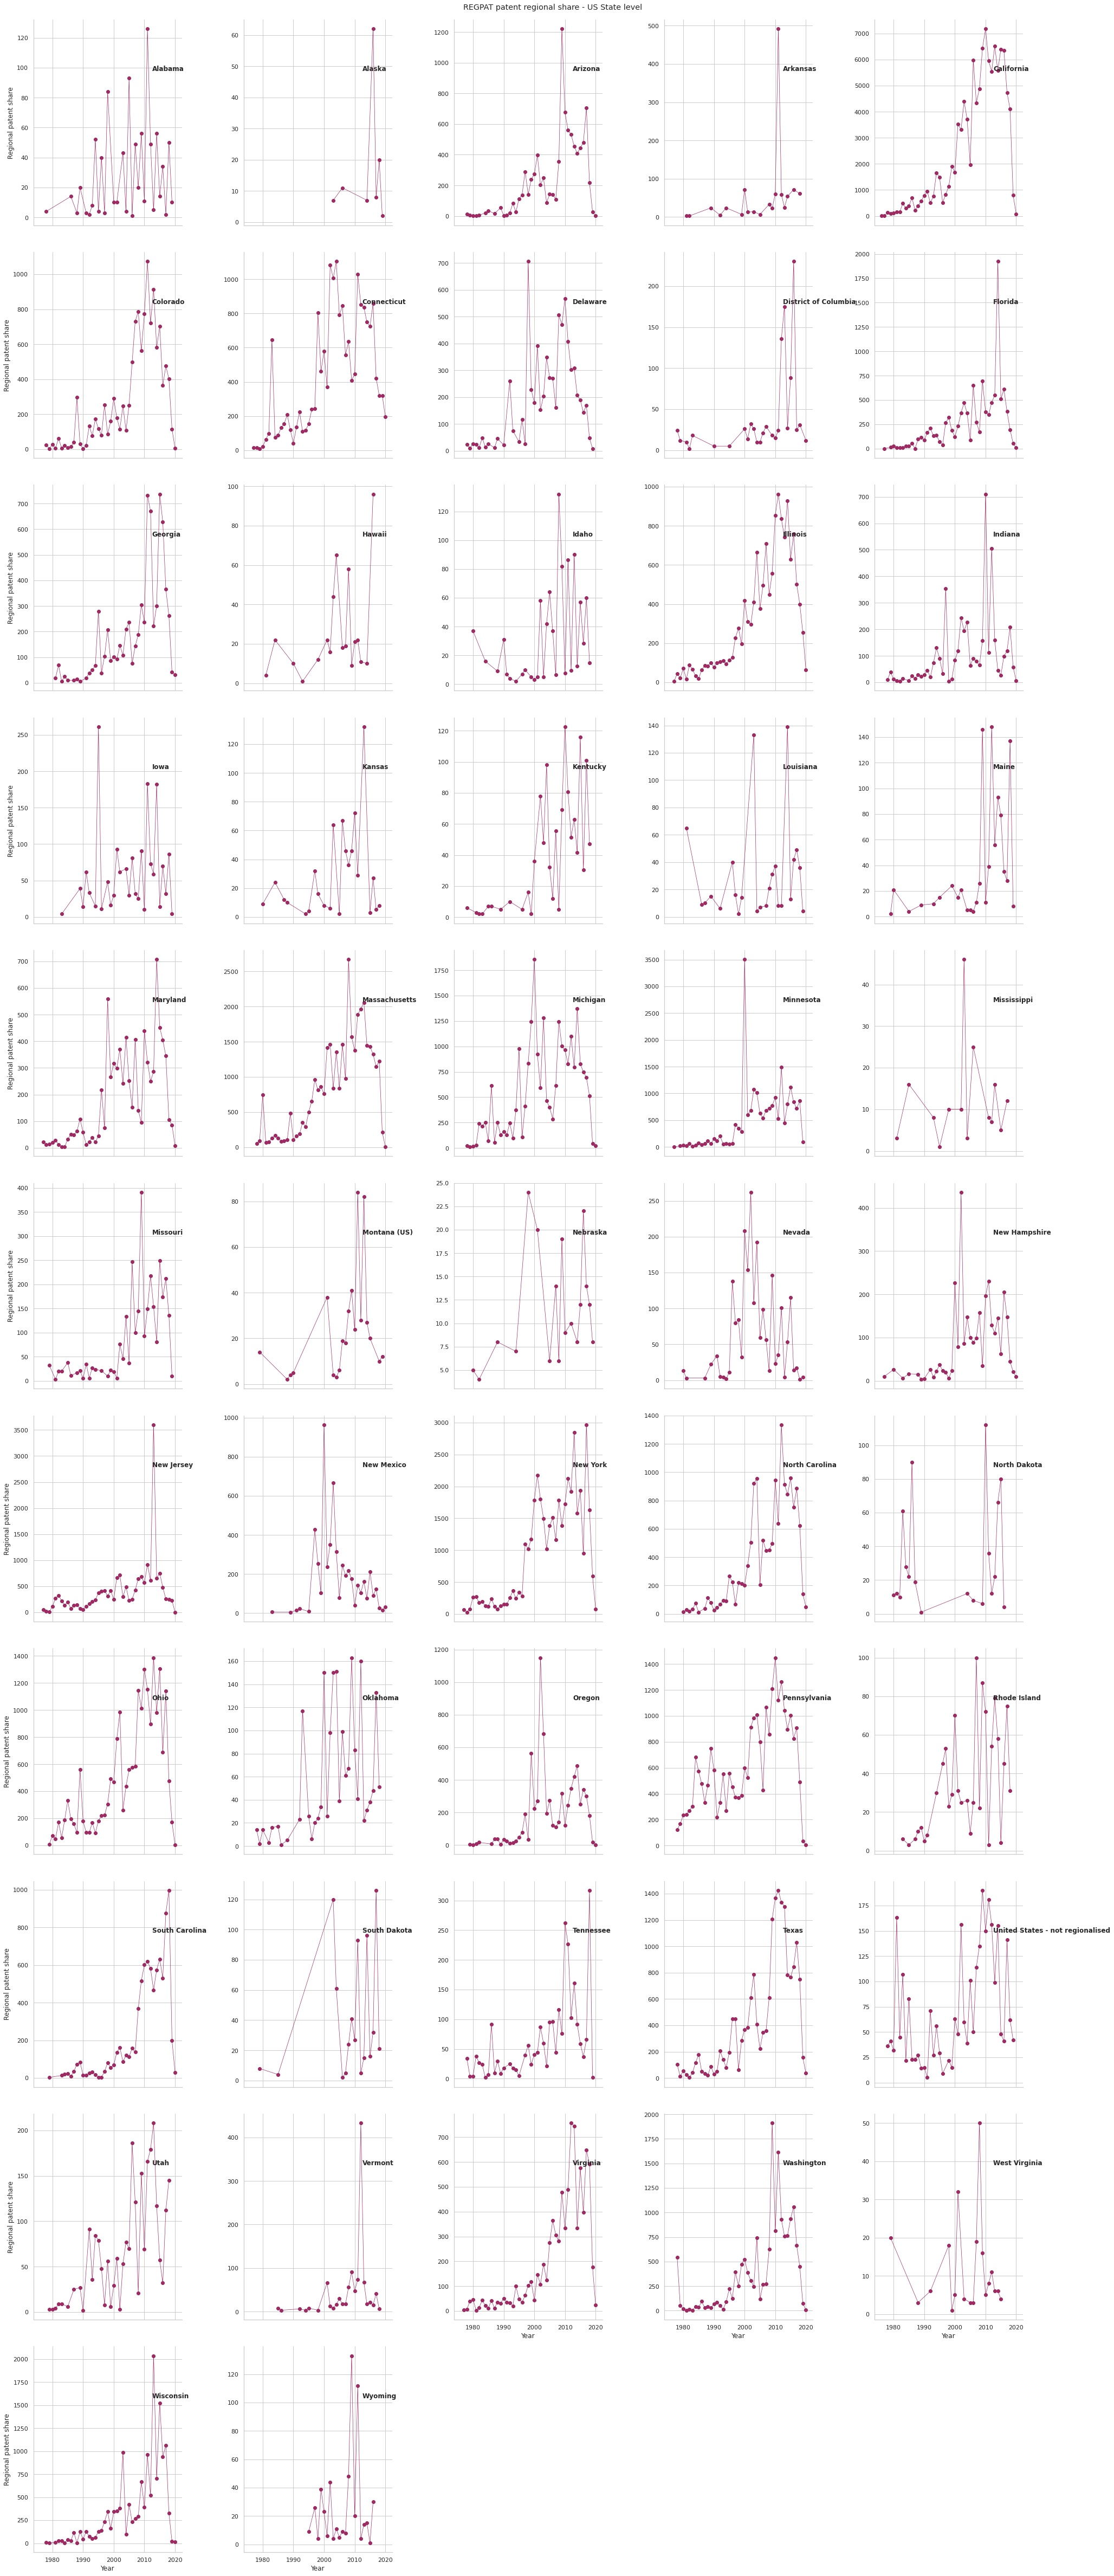

In [67]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plot the lines on two facets
g = sns.relplot(
    data=df_group,
    x="prio_year", y= "reg_share", 
    col="Up_reg_label",
    kind="scatter", 
    palette= "tab20c",
    col_wrap= 5,
    markers = True,
    linewidth=0.5,
    height=6, aspect=.95, facet_kws=dict(sharex=True, sharey = False))

# Iterate over each subplot to customize further
for Up_reg_label, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .75, Up_reg_label, transform=ax.transAxes, fontweight="bold") 

# Add lineplot
g.map(plt.plot, "prio_year", "reg_share", marker="o", color = "#9f2a63", linewidth=0.7)

g.set_axis_labels(x_var="Year", y_var="Regional patent share")

g.set_titles("")
g.figure.suptitle("REGPAT patent regional share - US State level", y= 1)

In [94]:
df_group.astype({'prio_year':'string'})

,Up_reg_label,prio_year,reg_share
0,Alabama,1978,4.0
1,Alabama,1986,14.0
2,Alabama,1988,3.0
3,Alabama,1989,20.0
4,Alabama,1991,3.0
...,...,...,...
1734,Wyoming,2012,4.0
1735,Wyoming,2013,14.0
1736,Wyoming,2014,15.0
1737,Wyoming,2015,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


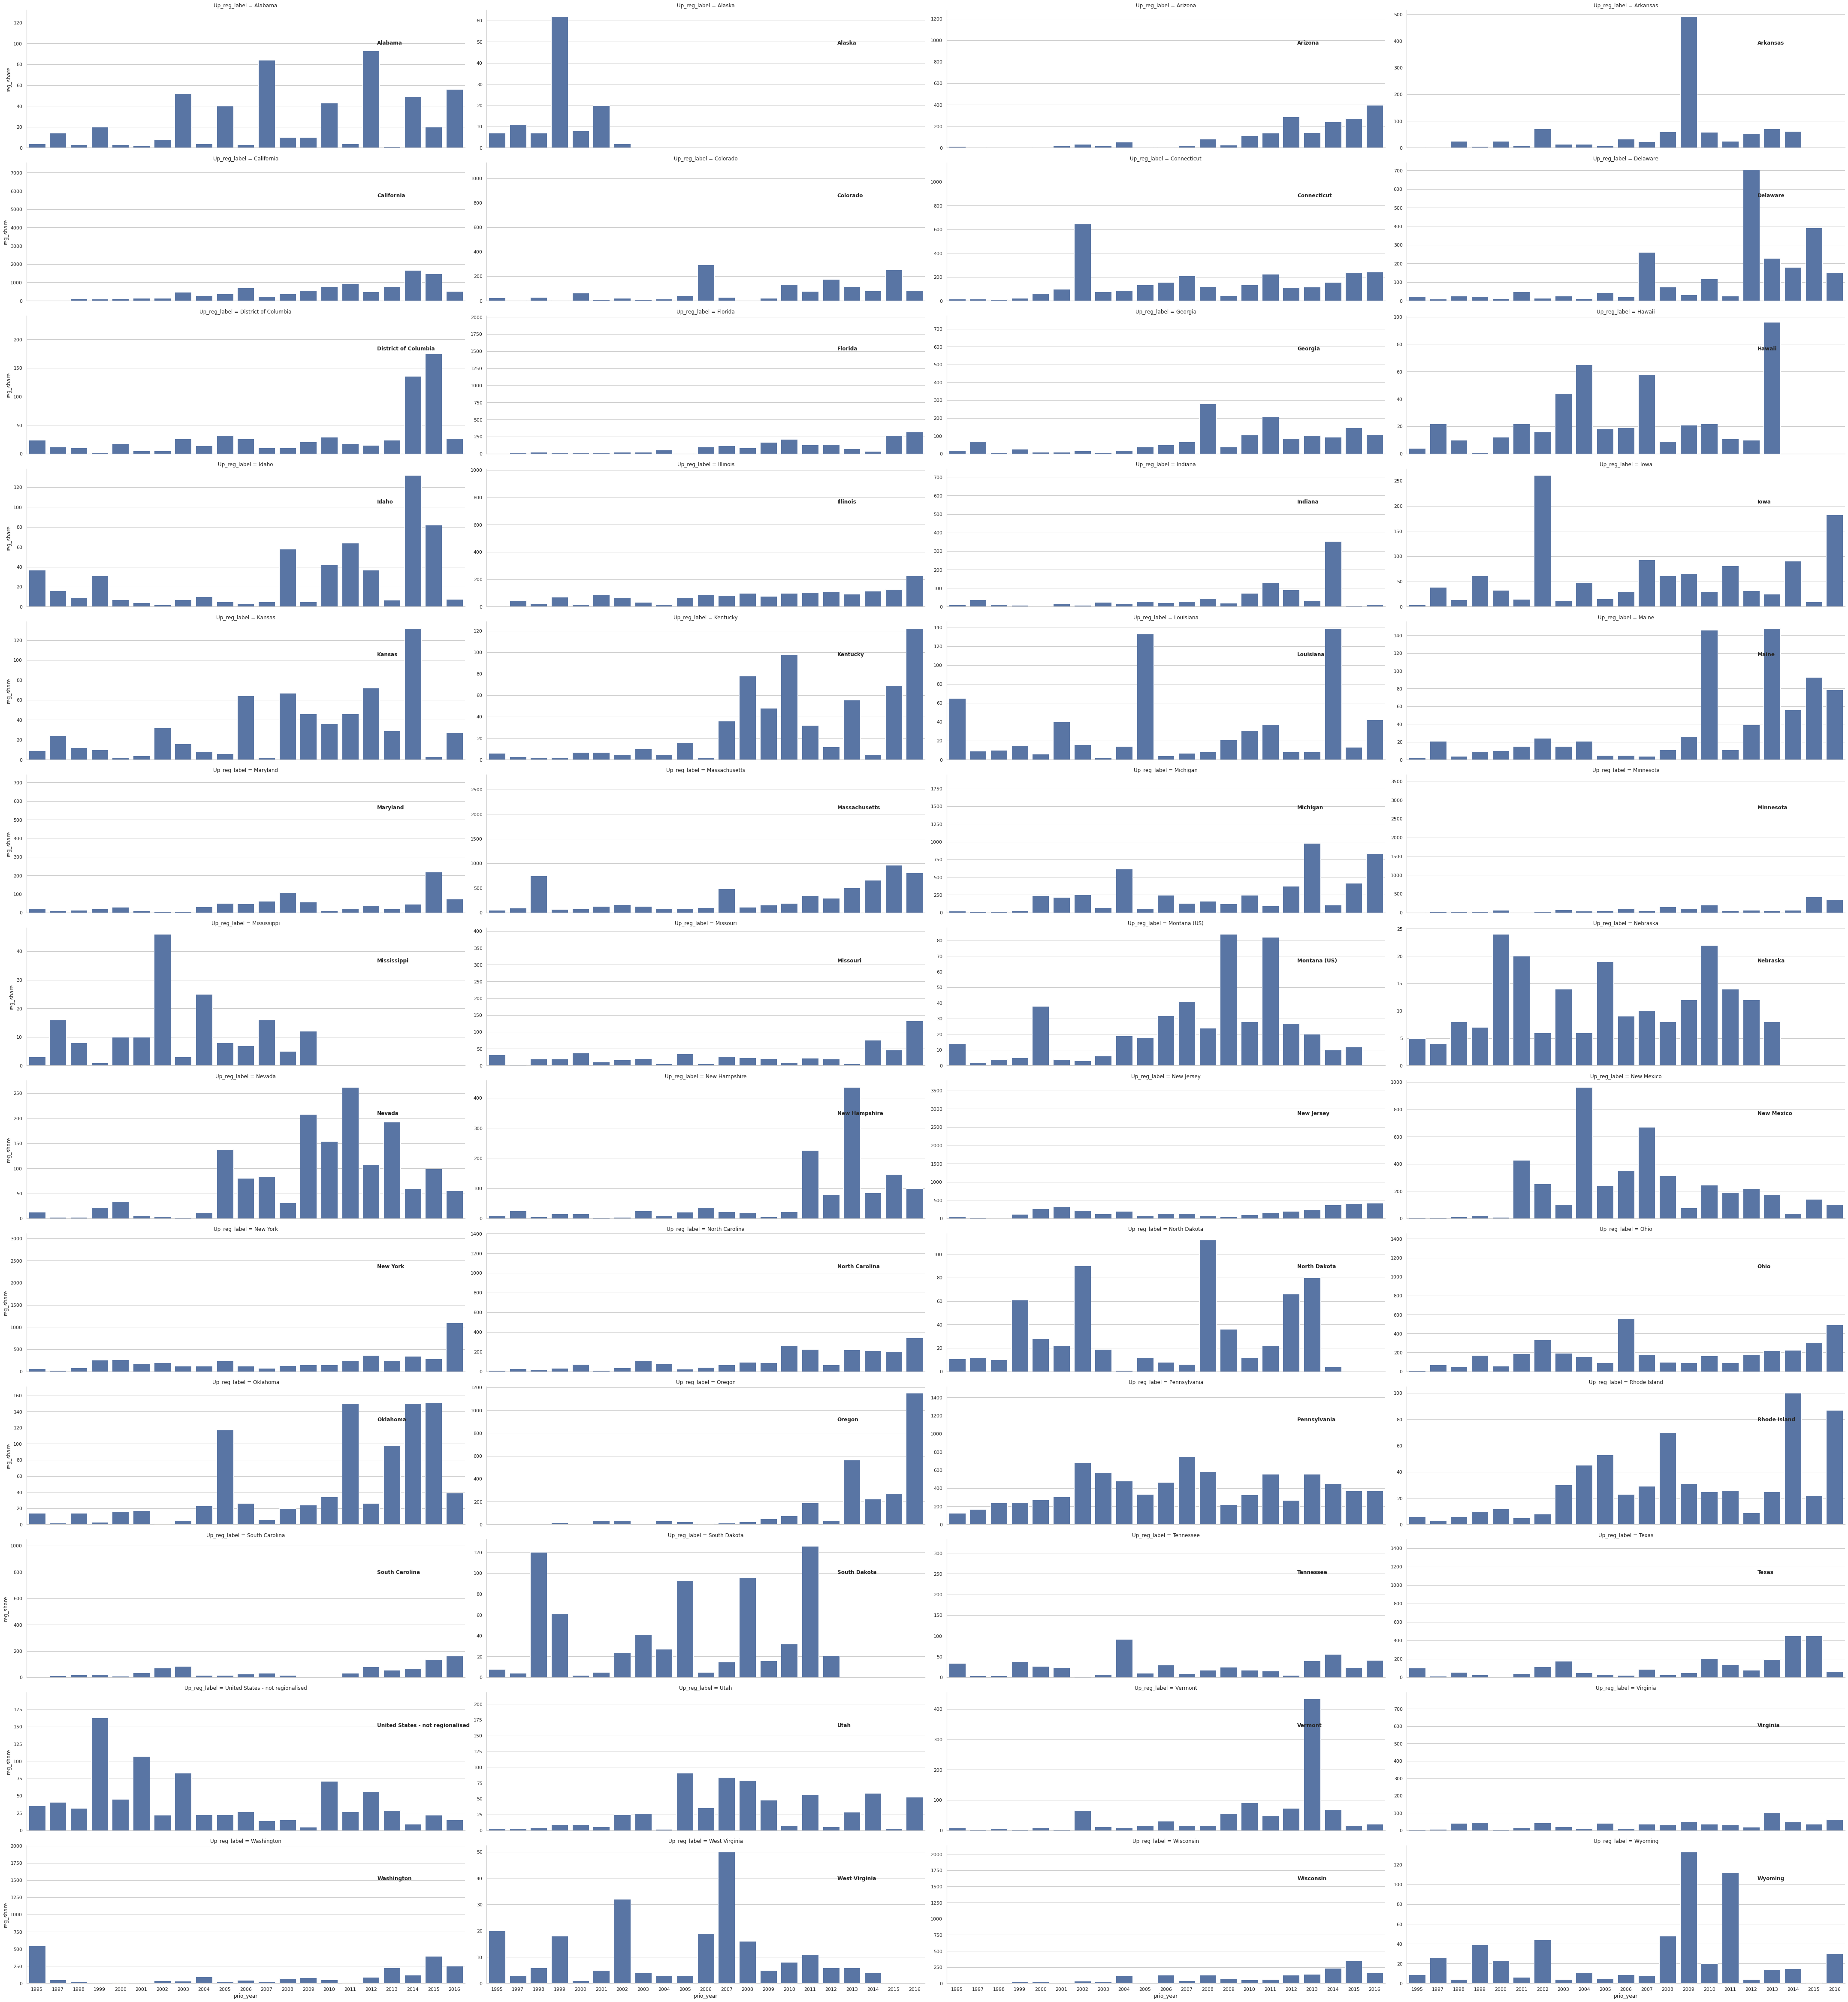

In [96]:
us = sns.FacetGrid(df_group, col='Up_reg_label', col_wrap=4, height=5, aspect=3, sharey = False, sharex = True, palette = "tab20c", xlim = (1976, 2019)) 
us.map(sns.barplot, 'prio_year', 'reg_share', order= [])

# Iterate over each subplot to customize further
for ctry_code, ax in us.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .75, ctry_code, transform=ax.transAxes, fontweight="bold") 

### Inspection of EU countries 

In [11]:
merged_eu = merged1.loc[merged1['ctry_code'].isin(['AT', 'BE', 'BG','CH', 'CZ', 'CY', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE',
      'IT', 'LT', 'LU', 'LV', 'NL', 'NO', 'PL', 'PT', 'SE', 'SI', 'SK', 'MT', 'RO'])]

In [12]:
merged_eu = pd.merge(merged_eu, merged_ipc_cpc, how='left', on= 'appln_id')

In [ ]:
# merged_eu = merged_eu.dropna() ? 

In [ ]:
len(merged_eu)

665967

In [15]:
merged_eu.head()

,app_nbr,appln_id,reg_code,ctry_code,reg_share,inv_share,reg_label,Up_reg_code,Up_reg_label,prio_year,app_year,IPC,CPC_Class
0,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland,NaN,NaN,NaN,NaN
1,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland,NaN,NaN,NaN,NaN
2,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland,NaN,NaN,NaN,NaN
3,EP20000103094,1,FI197,FI,1.0,0.250000,Pirkanmaa,FI19,Western Finland,NaN,NaN,NaN,NaN
4,EP20000107845,2,UKH12,GB,1.0,0.166667,Cambridgeshire CC,UKH,East of England,NaN,NaN,NaN,NaN


In [39]:
eu_plot = merged_eu[['ctry_code', 'prio_year','reg_share']]  

eu_group = eu_plot.groupby(['ctry_code', 'prio_year'], as_index = False).reg_share.sum()

In [40]:
eu_group = eu_group.astype({'prio_year':'int'})
print(eu_group.dtypes)

ctry_code     object
prio_year      int64
reg_share    float64
dtype: object


Text(0.5, 1, 'REGPAT patent regional share - EU 27')

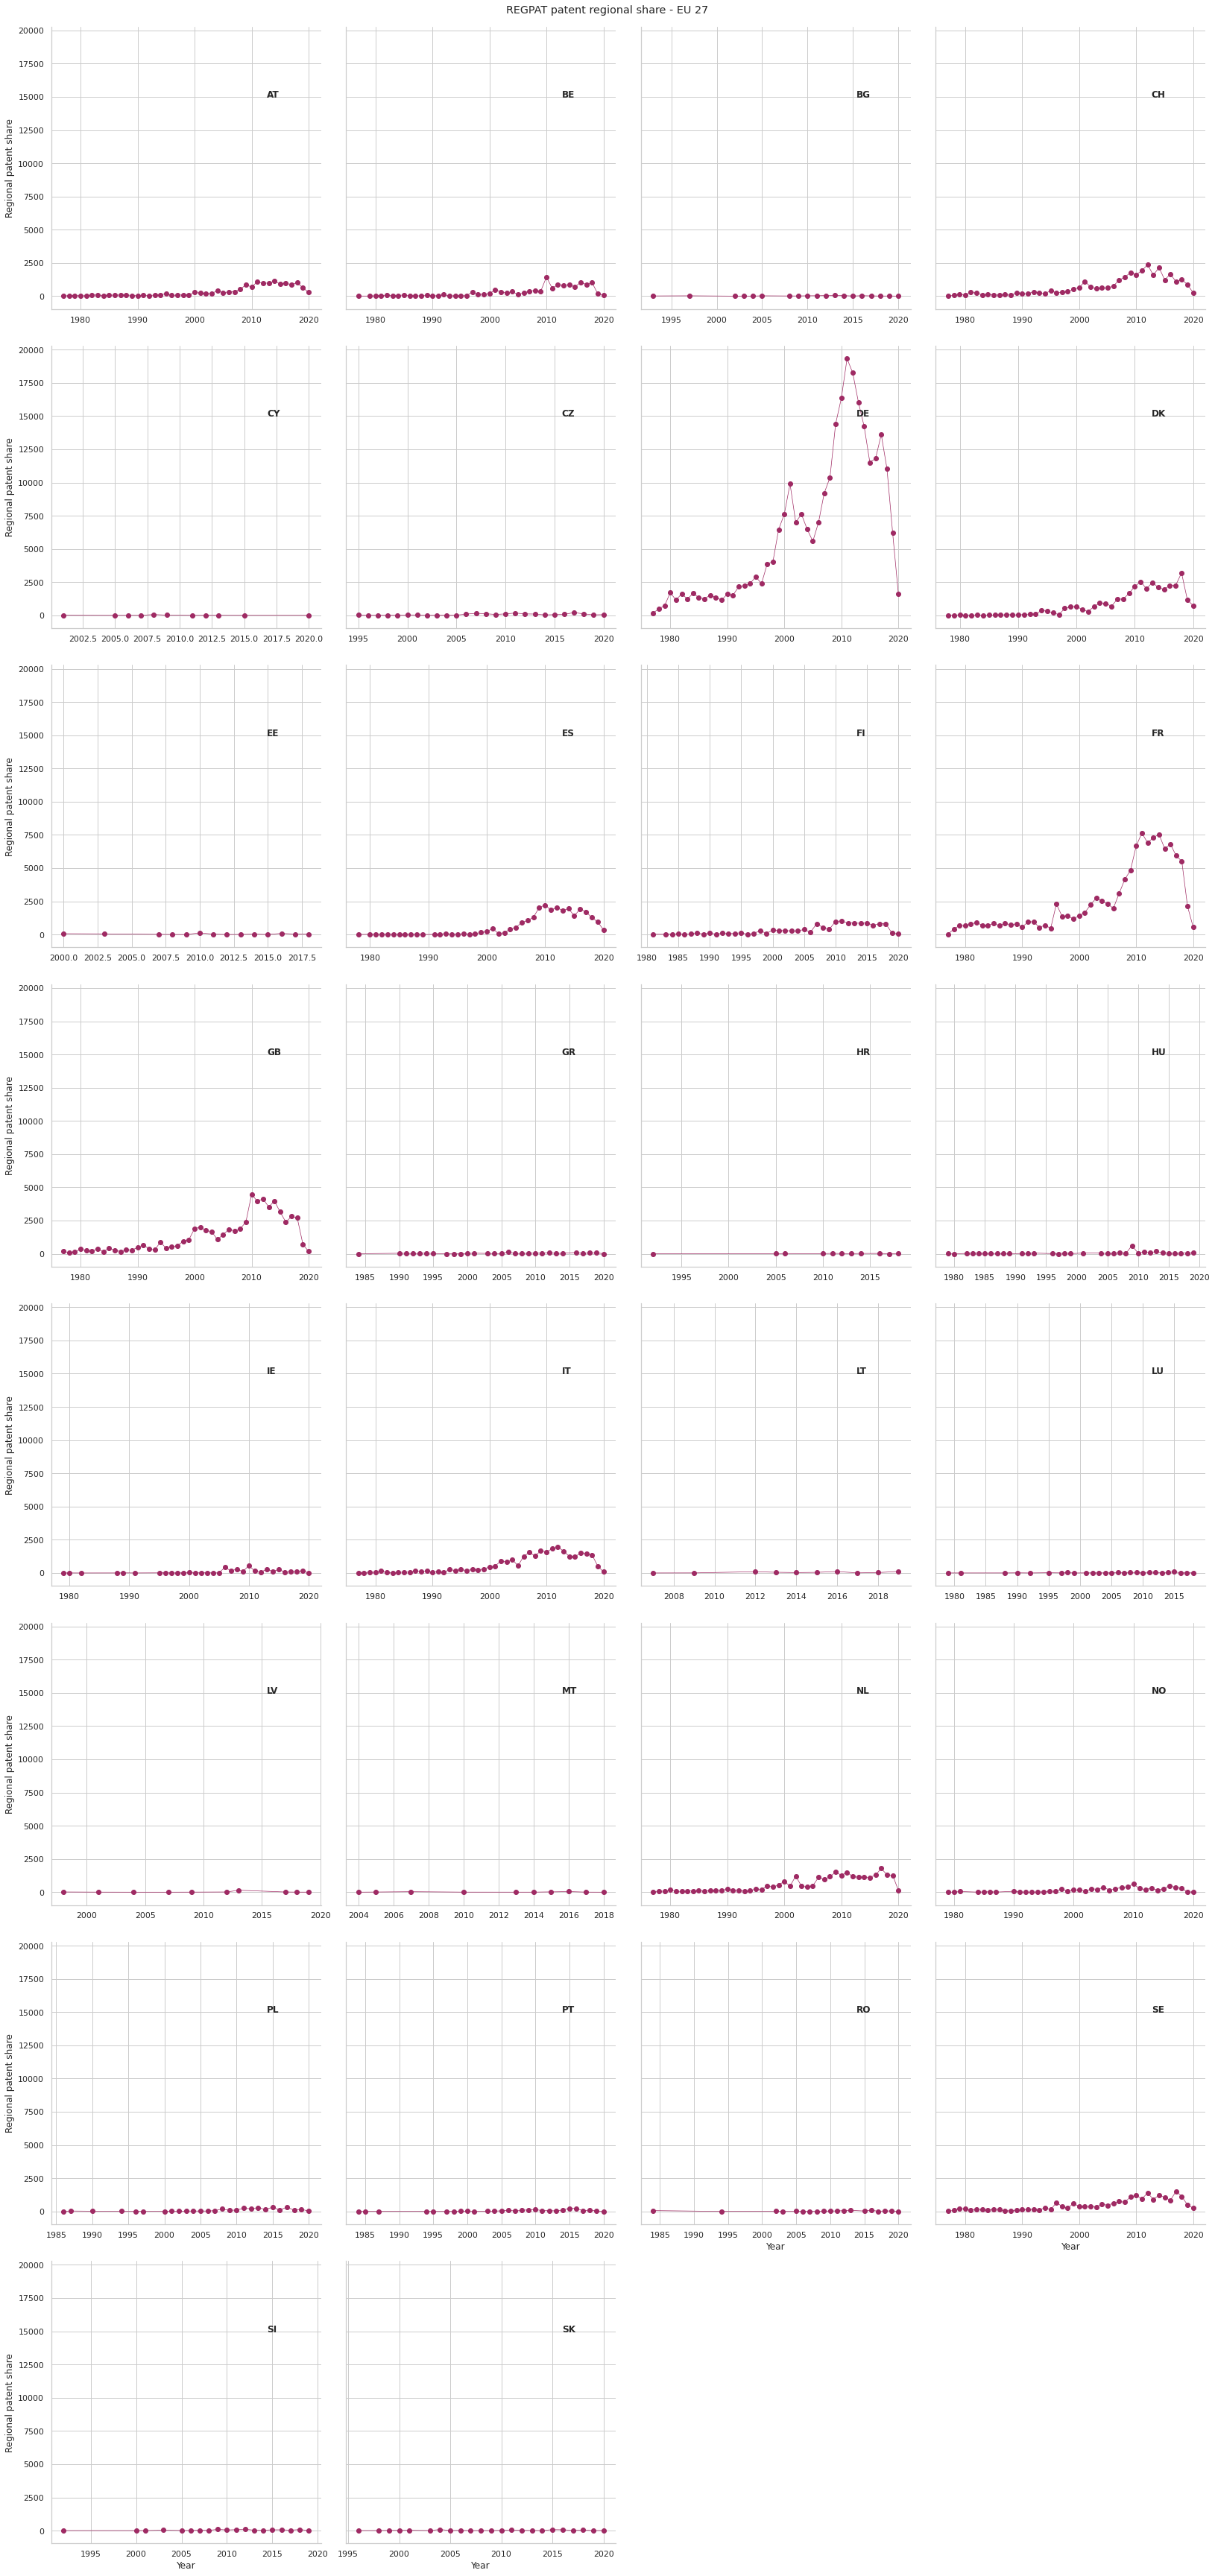

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plot the lines on two facets
eu = sns.relplot(
    data=eu_group,
    x="prio_year", y= "reg_share", 
    col="ctry_code",
    kind="scatter", 
    palette= "tab20c",
    col_wrap= 4,
    markers = True,
    linewidth=0.5,
    height=6, aspect=.95, facet_kws=dict(sharex=False))

# Iterate over each subplot to customize further
for ctry_code, ax in eu.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .75, ctry_code, transform=ax.transAxes, fontweight="bold") 

# Add lineplot
eu.map(plt.plot, "prio_year", "reg_share", marker="o", color = "#9f2a63", linewidth=0.7)

eu.set_axis_labels(x_var="Year", y_var="Regional patent share")

eu.set_titles("")
eu.figure.suptitle("REGPAT patent regional share - EU 27", y= 1)

Text(0.5, 1, 'REGPAT patent regional share - EU 27')

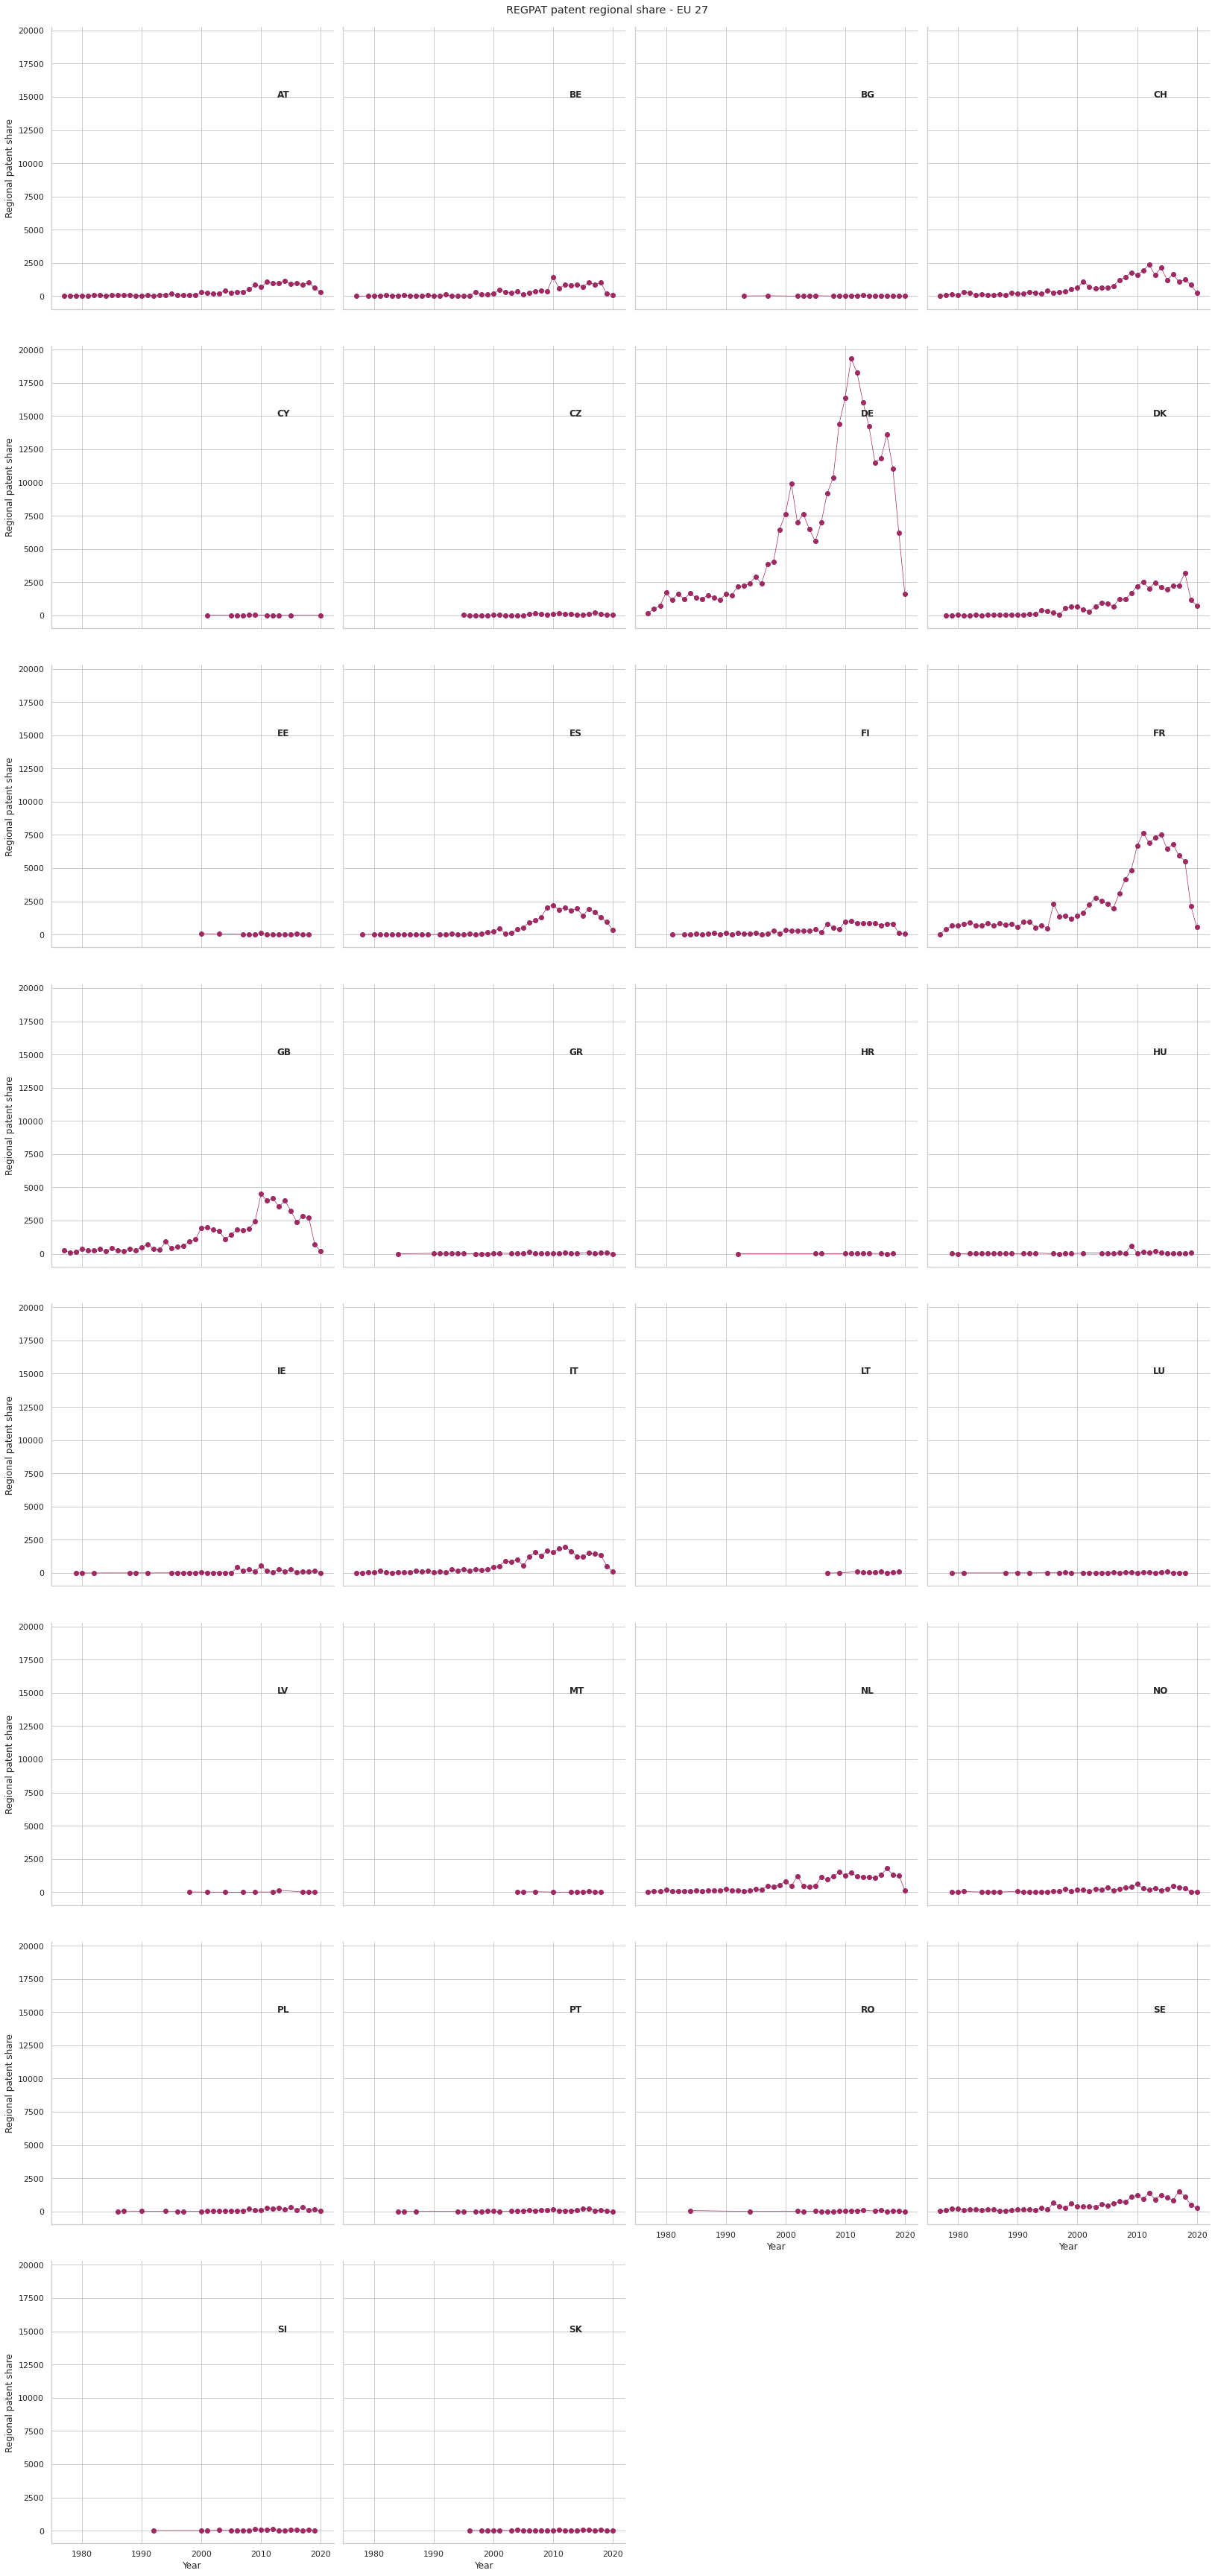

In [16]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plot the lines on two facets
eu = sns.relplot(
    data=eu_group,
    x="prio_year", y= "reg_share", 
    col="ctry_code",
    kind="scatter", 
    palette= "tab20c",
    col_wrap= 4,
    markers = True,
    linewidth=0.5,
    height=6, aspect=.95, facet_kws=dict(sharex=True))

# Iterate over each subplot to customize further
for ctry_code, ax in eu.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .75, ctry_code, transform=ax.transAxes, fontweight="bold") 

# Add markers
eu.map(plt.plot, "prio_year", "reg_share", marker="o", color = "#9f2a63", linewidth=0.7)

eu.set_axis_labels(x_var="Year", y_var="Regional patent share")

eu.set_titles("")
eu.figure.suptitle("REGPAT patent regional share - EU 27", y= 1)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


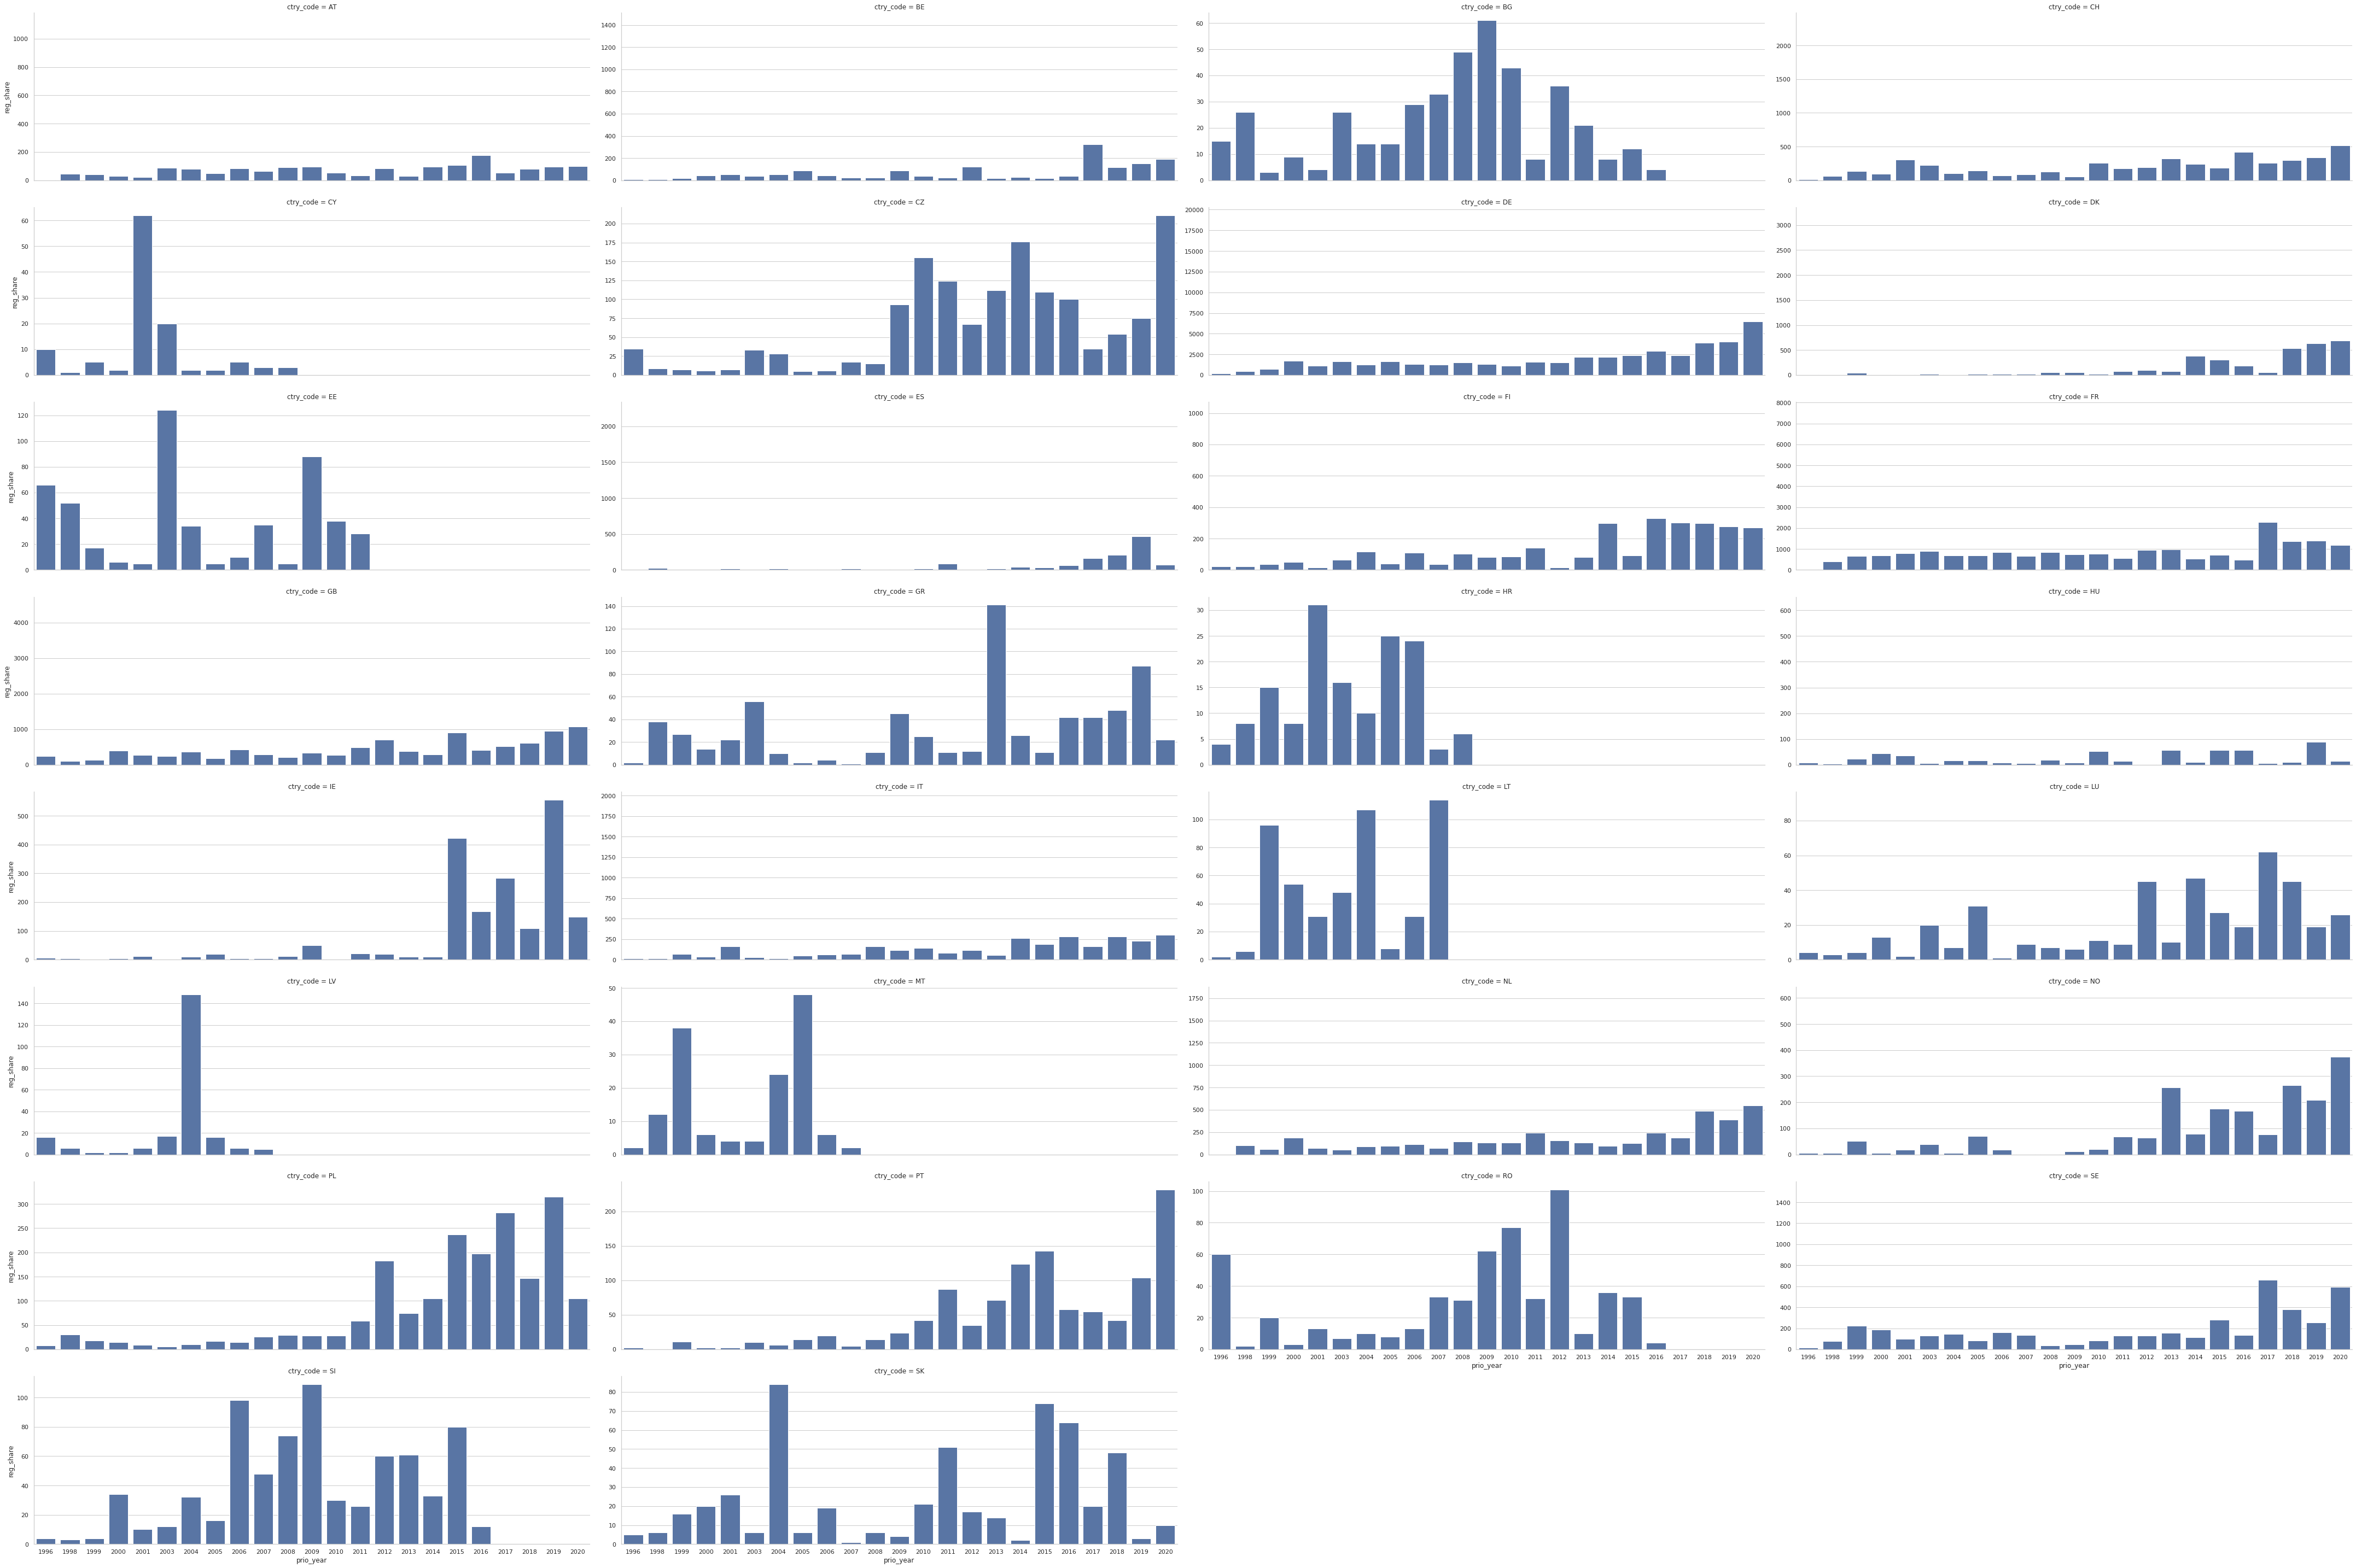

In [48]:
g = sns.FacetGrid(eu_group, col='ctry_code', col_wrap=4, height=5, aspect=3, sharey = False, sharex = True, palette = "tab20c") 
g.map(sns.barplot, 'prio_year', 'reg_share')

# Iterate over each subplot to customize further
for ctry_code, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .75, ctry_code, transform=ax.transAxes, fontweight="bold") 

In [ ]:
merged_sample = merged1['ctry_code'] == ['AT', 'BE', 'BR', 'CA', 'CH', 'CN', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HR', 'HU', 'IE',
      'IT', 'JP', 'KR','LT', 'LU', 'LV', 'NL', 'NO', 'PL', 'PT', 'SE', 'SI',  'SK', 'ZA']

In [ ]:
merged_all.head()

## Citation counts

In [ ]:
cit_counts = pd.read_csv('/content/202208_EPO_CIT_COUNTS.txt', encoding ='utf-8', sep = '|')

In [ ]:
cit_counts.columns

Index(['EP_Pub_nbr', 'EP_Pub_date', 'EP_Appln_id', 'WO_Pub_nbr', 'WO_Appln_id',
       'EP_Grant', 'Withdrawal', 'Refusal', 'EP_Pat_Cits', 'EP_NPL_Cits',
       'WO_Pat_Cits', 'WO_NPL_Cits', 'Total_Pat_Cits', 'Total_NPL_Cits',
       'Total_Cits', 'EP_Pat_XCits', 'EP_NPL_XCits', 'WO_Pat_XCits',
       'WO_NPL_XCits', 'Total_Pat_XCits', 'Total_NPL_XCits', 'Total_XCits',
       'Recd_asEP_byEP', 'Recd_asWO_byEP', 'Recd_asEP_byWO', 'Recd_asWO_byWO',
       'Direct_cits_Recd', 'Recd_asEQV_byEP', 'Recd_asEQV_byWO',
       'Total_cits_Recd', 'Recd_in3_asEP', 'Recd_in3_asWO',
       'Direct_cits_Recd_in3', 'Recd_in3_asEQV', 'Total_cits_Recd_in3'],
      dtype='object')

# Interesting variables: 
 - Direct_cits_Recd_in3 Total citations received within 3 years as either EP or WO publication
 - Total_cits_Recd_in3 All citations received [25]+[26]

 Both can be considered as forward citations


## Quality Indicators

In [ ]:
epo_qual = pd.read_csv('/content/202208_OECD_PATENT_QUALITY_EPO_INDIC.txt', encoding ='utf-8', sep = '|')

In [ ]:
epo_qual.head()

,appln_id,app_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,...,fwd_cits7,fwd_cits7_xy,breakthrough,breakthrough_xy,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,16427085,EP19780100001,1978,16.0,1,3,7,1203.0,4,0,...,4,0,NaN,NaN,0.705247,0.793388,0.090909,13.0,0.383706,0.406093
1,16427086,EP19780100002,1978,31.0,0,1,3,783.0,3,0,...,1,0,NaN,NaN,0.000000,0.500000,0.000000,6.0,0.207331,0.272474
2,16427087,EP19780100003,1978,32.0,1,2,1,NaN,7,0,...,1,0,NaN,NaN,NaN,0.704082,0.428571,2.0,NaN,NaN
3,16427088,EP19780100004,1978,14.0,1,4,8,783.0,1,1,...,1,0,NaN,NaN,0.693878,0.666667,0.000000,6.0,0.260275,0.299739
4,16427089,EP19780100005,1978,8.0,0,1,4,699.0,4,0,...,1,0,NaN,NaN,0.000000,0.459834,0.000000,6.0,0.145969,0.294256


In [ ]:
len(epo_qual)

606329

In [ ]:
epo_qual.columns

Index(['appln_id', 'app_nbr', 'filing', 'tech_field', 'many_field',
       'patent_scope', 'family_size', 'grant_lag', 'bwd_cits', 'npl_cits',
       'claims', 'claims_bwd', 'fwd_cits5', 'fwd_cits5_xy', 'fwd_cits7',
       'fwd_cits7_xy', 'breakthrough', 'breakthrough_xy', 'generality',
       'originality', 'radicalness', 'renewal', 'quality_index_4',
       'quality_index_6'],
      dtype='object')

Interesting variables:
- Patent quality index 4 – 4 components: number of forward citations (up to 5 years afterpublication); patent family size; number of claims; and the patent generality index. Only granted patents are covered by the index.
- Patent quality index 4b – 4 components, bis: number of forward citations (up to 5 years after publication); patent family size; corrected claims; and the patent generality index. Only granted patents are covered by the index.
- Patent quality index 6 – 6 components: covers the same components as above, plus the number of backward citations and the grant lag index.
- 

## REGPAT - PCT


In [ ]:
pct_inv = pd.read_csv(, encoding = "uft-8", sep = ",")

In [ ]:
pct_ipc = pd.read_csv("/content/202208_PCT_IPC.txt", encoding = "uft-8", sep = "|")

In [ ]:
pct_ipc.head()

In [ ]:
merged_ipc_cpc_pct = pd.merge(pct_ipc, cpc_y02e, how='left', on= 'appln_id')

In [ ]:
merged_ipc_cpc_pct.head()